In [ ]:
# Part 2 Rolling and expanding

In [3]:
import pandas as pd
import numpy as np

In [4]:
salesData = pd.read_csv(r"C:\Users\atalb\Documents\Coding\MLandAI\PandasNumpy\datasets\Sample-Superstore.csv", encoding="latin1")
# salesData.head()

In [5]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
salesData['Order Date'] = pd.to_datetime(salesData['Order Date'])
salesData['OrderDateMonth'] = salesData['Order Date'].apply(lambda x:x.month)
salesData['OrderDateYear'] = salesData['Order Date'].apply(lambda x:x.year)

salesMonthYear = pd.pivot_table(salesData, index=['OrderDateMonth'], columns=['OrderDateYear'], aggfunc='sum', values='Sales')

<Axes: xlabel='OrderDateMonth'>

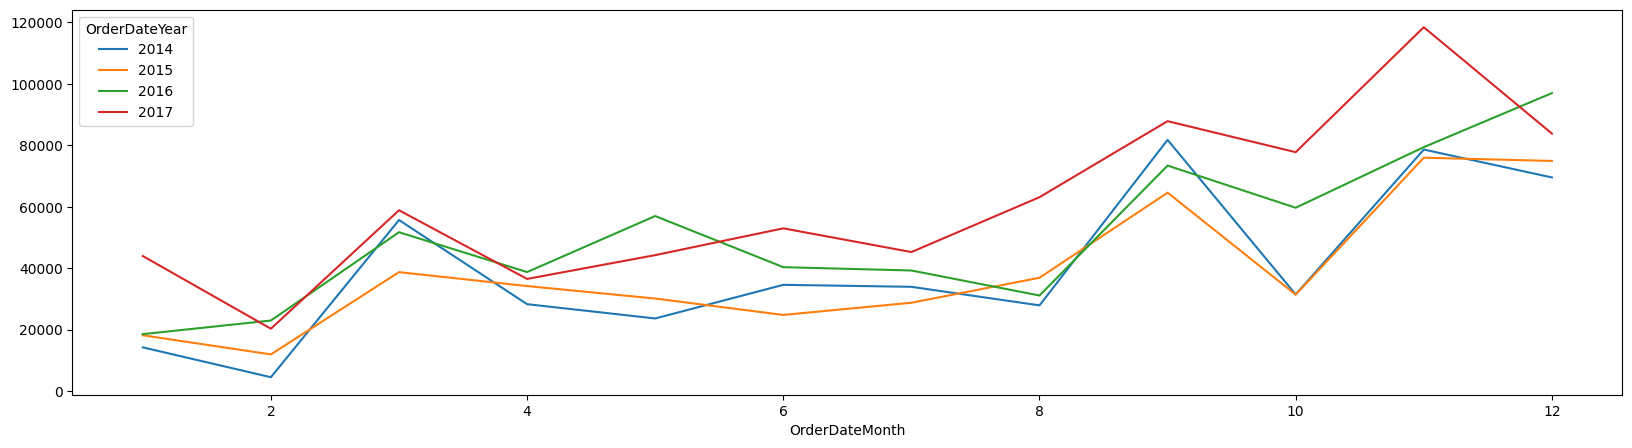

In [8]:
salesMonthYear.plot(figsize=(20,5))

In [9]:
salesMonthYear

OrderDateYear,2014,2015,2016,2017
OrderDateMonth,,,,
1,14236.8950,18174.0756,18542.4910,43971.3740
2,4519.8920,11951.4110,22978.8150,20301.1334
3,55691.0090,38726.2520,51715.8750,58872.3528
4,28295.3450,34195.2085,38750.0390,36521.5361
5,23648.2870,30131.6865,56987.7280,44261.1102
6,34595.1276,24797.2920,40344.5340,52981.7257
7,33946.3930,28765.3250,39261.9630,45264.4160
8,27909.4685,36898.3322,31115.3743,63120.8880
9,81777.3508,64595.9180,73410.0249,87866.6520


In [10]:
## Window functions
robject = salesMonthYear.rolling(2)
robject

Rolling [window=2,center=False,axis=0,method=single]

<Axes: xlabel='OrderDateMonth'>

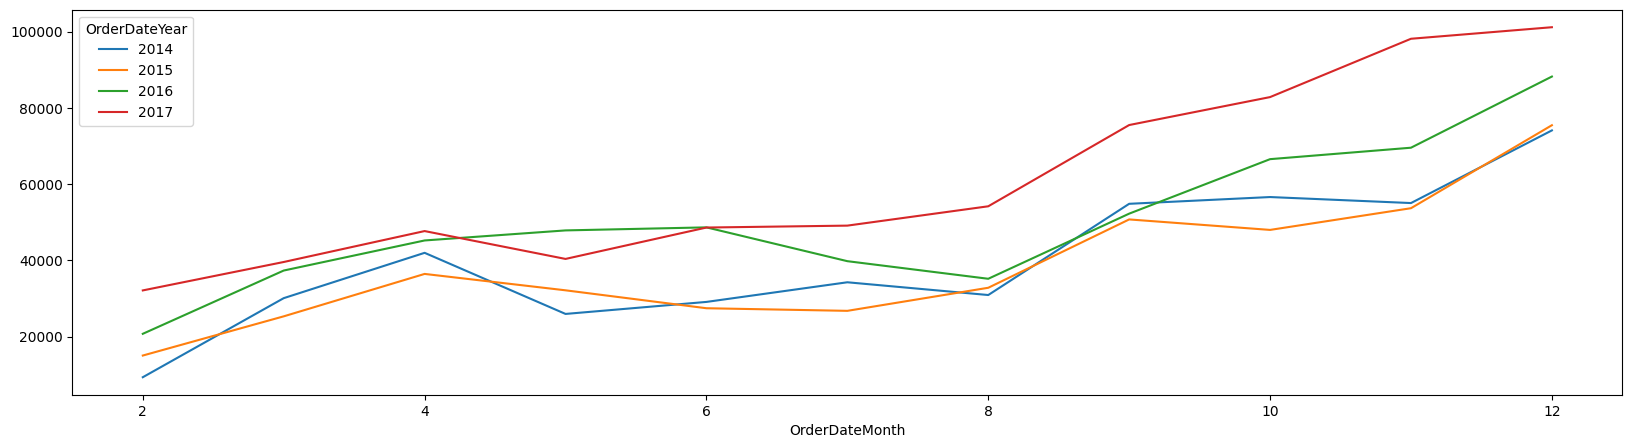

In [11]:
robject.mean().plot(figsize=(20,5))

<Axes: xlabel='OrderDateMonth'>

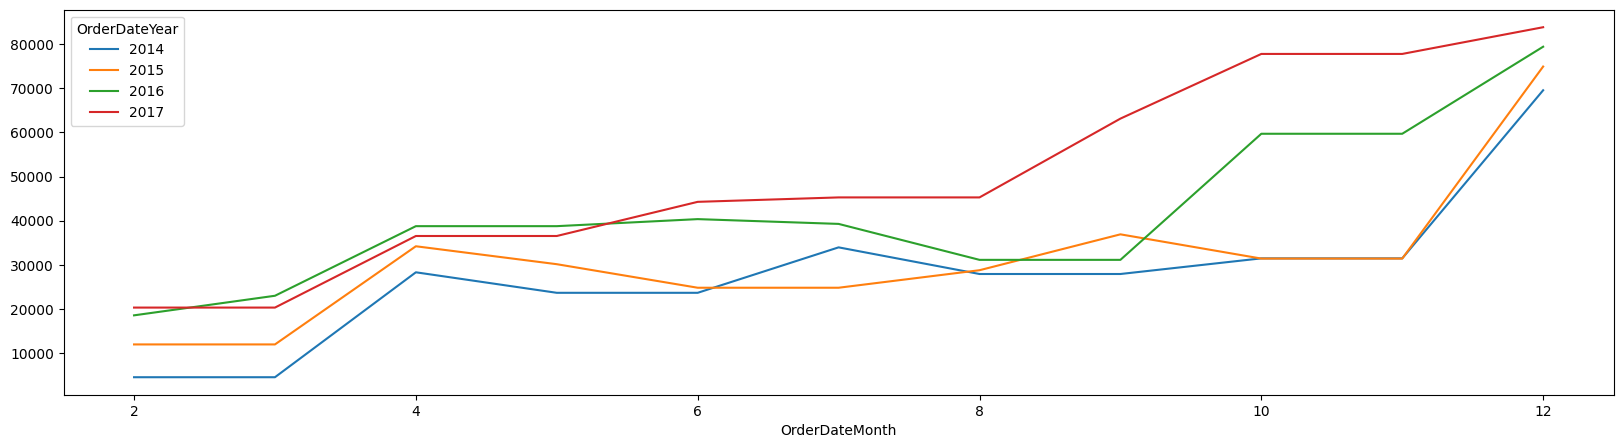

In [12]:
robject.min().plot(figsize=(20,5))

array([<Axes: xlabel='OrderDateMonth'>, <Axes: xlabel='OrderDateMonth'>,
       <Axes: xlabel='OrderDateMonth'>, <Axes: xlabel='OrderDateMonth'>],
      dtype=object)

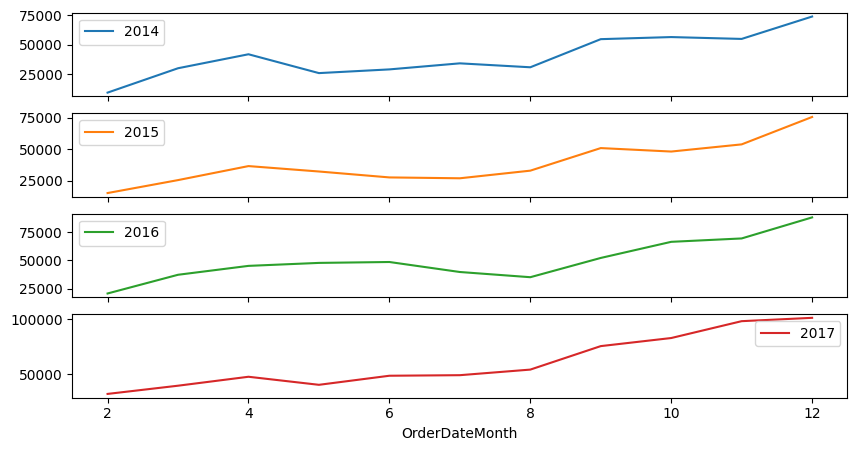

In [13]:
robject.mean().plot(subplots=True, figsize=(10,5))

In [15]:
## Expaning function
df = pd.DataFrame(data= {'A':range(10)})
expObj = df.expanding(min_periods=1)
df['expP1']=expObj.sum()

In [16]:
df

,A,expP1
0,0,0.0
1,1,1.0
2,2,3.0
3,3,6.0
4,4,10.0
5,5,15.0
6,6,21.0
7,7,28.0
8,8,36.0
9,9,45.0


In [17]:
## ewm -  exponential weighted functions
df1 = pd.DataFrame(data= {'A':range(10)})

In [18]:
expObj = df1.ewm(com=0.5)
df1['expMean'] = expObj.mean()
df1

,A,expMean
0,0,0.000000
1,1,0.750000
2,2,1.615385
3,3,2.550000
4,4,3.520661
5,5,4.508242
6,6,5.503202
7,7,6.501220
8,8,7.500457
9,9,8.500169
